#Mini desafios

## Mini desafio 1a

Utilizando la función np.polyfit hagan aproximaciones para los pesos de personas con alturas de 150, 170 y 190 cm. Comparen los valores provistos por las aproximaciones de grado 1 y de grado 2. ¿Qué pasa si usamos grado 20? ¿Tiene sentido dicha curva de aproximación para predecir datos nuevos? ¿Por qué falla?

+-------+-------------------+-------------------+--------------------+
| Grado |        150        |        170        |        190         |
+-------+-------------------+-------------------+--------------------+
|   1   | 49.53791758107786 | 76.72396976347241 | 103.91002194586693 |
|   2   | 53.69754890661269 | 76.17303859366089 | 103.83380744577607 |
|   20  | 33173.83947753906 |  81.3443603515625 | 319.75469970703125 |
+-------+-------------------+-------------------+--------------------+


/tmp/ipython-input-2789815607.py:31: RankWarning: Polyfit may be poorly conditioned
  coef = np.polyfit(Alturas, Pesos, 20)


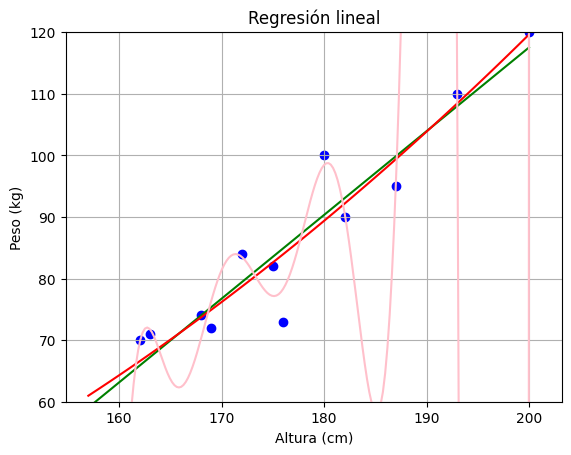

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from prettytable import PrettyTable

Alturas = [180, 162, 168, 175, 193, 187, 157, 176, 169, 163, 200, 172, 182]
Pesos = [100, 70, 74, 82, 110, 95, 57, 73, 72, 71, 120, 84, 90]

# Realizamos la aproximacion de orden 1
a, b = np.polyfit(Alturas, Pesos, 1)

X1 = []
Y1 = []

for x in range(min(Alturas), max(Alturas) + 1):
    X1.append(x)
    y = a * x + b
    Y1.append(y)

# Realizamos la aproximacion de orden 2
c, d, e = np.polyfit(Alturas, Pesos, 2)

X2 = []
Y2 = []

for x in range(min(Alturas), max(Alturas) + 1):
    X2.append(x)
    y = c * x**2 + d * x + e
    Y2.append(y)

# Realizamos la aproximacion de orden 20
coef = np.polyfit(Alturas, Pesos, 20)
poly = np.poly1d(coef)

X_fit = np.linspace(min(Alturas), max(Alturas)+1, 200)
Y_fit = poly(X_fit)

table = PrettyTable()
table.field_names = ["Grado", 150, 170, 190]
table.add_row([1, a*150+b, a*170+b, a*190+b])
table.add_row([2, c*150**2+d*150+e, c*170**2+d*170+e, c*190**2+d*190+e])
table.add_row([20, poly(150), poly(170), poly(190)])

print(table)

plt.scatter(Alturas, Pesos, color='blue', marker='o', label='Datos')
plt.plot(X1, Y1, color='green')
plt.plot(X2, Y2, color='red')
plt.plot(X_fit, Y_fit, color='pink')
plt.title("Regresión lineal")
plt.xlabel("Altura (cm)")
plt.ylabel("Peso (kg)")
plt.ylim(60, 120)
plt.grid(True)
plt.show()

Se puede observar que la curva de grado 20 realiza overfitting de los datos, generando una curva que no aproxima correctamente datos intermedios.

## Mini desafio 2

Prueben ahora como es trabajar con Naive Bayes, pueden probar agregando mensajes para modificar la precisión, cambiando las etiquetas asociadas (spam y no spam) e incluso modificando el problema completamente (detectar si un mensaje es amigable o agresivo por ejemplo):

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

mensajes = [

    "'import matplotlib.pyplot as plt import numpy as np from prettytable import PrettyTable Alturas = [180, 162, 168, 175, 193, 187, 157, 176, 169, 163, 200, 172, 182] Pesos = [100, 70, 74, 82, 110, 95, 57, 73, 72, 71, 120, 84, 90] a, b = np.polyfit(Alturas, Pesos, 1) X1 = [] Y1 = [] for x in range(min(Alturas), max(Alturas) + 1): X1.append(x) y = a * x + b Y1.append(y)",
    "c, d, e = np.polyfit(Alturas, Pesos, 2) X2 = [] Y2 = [] for x in range(min(Alturas), max(Alturas) + 1): X2.append(x) y = c * x**2 + d * x + e Y2.append(y)",
    "coef = np.polyfit(Alturas, Pesos, 20) poly = np.poly1d(coef) X_fit = np.linspace(min(Alturas), max(Alturas)+1, 200) Y_fit = poly(X_fit) table = PrettyTable( table.field_names = [, 150, 170, 190] table.add_row([1, a*150+b, a*170+b, a*190+b]) table.add_row([2, c*150**2+d*150+e, c*170**2+d*170+e, c*190**2+d*190+e]) table.add_row([20, poly(150), poly(170), poly(190)]) print(table)",
    "Prueben ahora como es trabajar con Naive Bayes, pueden probar agregando mensajes para modificar la precisión, cambiando las etiquetas asociadas (spam y no spam) e incluso modificando el problema completamente (detectar si un mensaje es amigable o agresivo por ejemplo):",
    "Prueben ahora con 2 neuronas, con 3 neuronas y con 4 neuronas; y observen el umbral de decisión para cada caso. ¿Hay algún valor a partir del cual el accuracy se dispara hacia valores cercanos a 1? ¿Qué relación tiene con el umbral de decisión aprendido para cada caso?",
    "Experimenten cambiando la cantidad de capas y cantidad de neuronas de cada una. También, prueben aumentar la cantidad de epochs. Noten cómo cambia la cantidad de parámetros entrenables (en el model.summary), cómo influye en el tiempo que tarda el entrenamiento y cuánta mejora se obtiene por complejizar al modelo."
    ]
etiquetas = ["Codigo", "Codigo", "Codigo", "Consigna", "Consigna", "Consigna"]

vectorizador = CountVectorizer()
X = vectorizador.fit_transform(mensajes)

modelo = MultinomialNB()
modelo.fit(X, etiquetas)

# Clasificamos 4 mensajes
mensajes = ["import numpy as np import matplotlib.pyplot as plt import pandas as pd"]
for mensaje in mensajes:
  X_nuevo = vectorizador.transform([mensaje])
  prediccion = modelo.predict(X_nuevo)
  print(prediccion[0])

Codigo


## **Mini Desafio 3a**

Crear para el problema anterior, un modelo con una sola capa y una sola neurona; entrenarlo y testearlo (pueden reutilizar las funciones que ya hemos provisto). Prueben cambiar la cantidad de epochs de entrenamiento. ¿Para qué casos da mejor **accuracy**? ¿Una sola neurona alcanza para obtener un resultado similar al obtenido anteriormente? Utilicen la función provista para graficar el umbral de decisión y observen qué terminó aprendiendo la red.

In [ ]:
# Mini desafío 3a
# Les acercamos la primera parte del código

# 1. Librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

X, y = make_circles(n_samples=300, noise=0.15, factor=0.2, random_state=42)

df = pd.DataFrame(X, columns=['x1', 'x2'])
df['target'] = y

X_train, X_test, y_train, y_test = train_test_split(df[['x1', 'x2']], df['target'], test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Definimos la red neuronal MLP
model = Sequential([
    Dense(1, input_shape=(2,), activation='sigmoid')
])

model.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

# 6. Entrenamos el modelo
history = model.fit(X_train_scaled, y_train, batch_size=32, epochs=50, validation_split=0.2, verbose=1)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_28 (Dense)                │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3 (12.00 B)

 Trainable params: 3 (12.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - accuracy: 0.5394 - loss: 0.9061 - val_accuracy: 0.4375 - val_loss: 1.1257
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5450 - loss: 0.8649 - val_accuracy: 0.4375 - val_loss: 1.0993
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5756 - loss: 0.7934 - val_accuracy: 0.4375 - val_loss: 1.0780
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5772 - loss: 0.7940 - val_accuracy: 0.4375 - val_loss: 1.0537
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5377 - loss: 0.8373 - val_accuracy: 0.4375 - val_loss: 1.0288
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5952 - loss: 0.7839 - val_accuracy: 0.4375 - val_loss: 1.0056
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5748 - loss: 0.7903 - val_accuracy: 0.4375 - val_loss: 0.9843
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5567 - loss: 0.7771 - val_accuracy: 0.4375 - val_loss: 0.9644


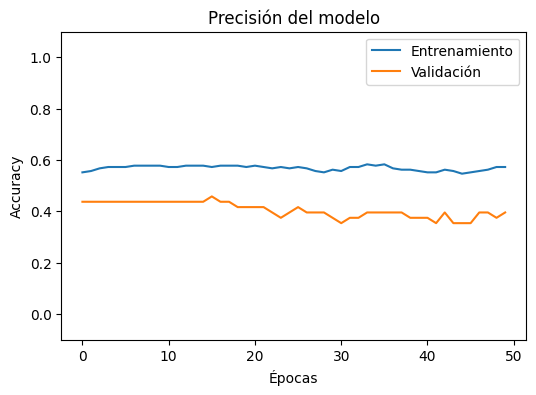

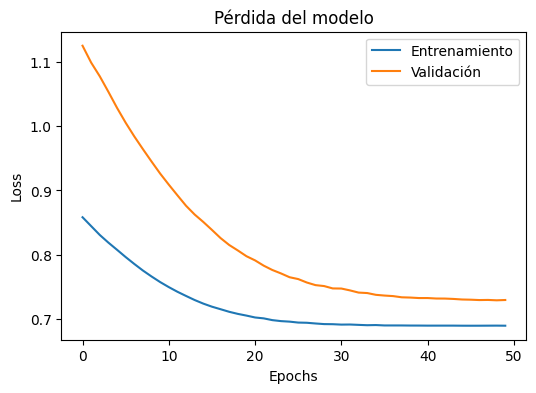

In [ ]:
# Accuracy
plt.figure(figsize=(6, 4))
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.ylim([-0.1,1.1])
plt.title('Precisión del modelo')
plt.xlabel('Épocas')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss
plt.figure(figsize=(6, 4))
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Pérdida del modelo')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Evaluamos
loss, acc = model.evaluate(X_test_scaled, y_test)
print(f'\n🔎 Precisión en test: {acc*100:.2f}%')

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step - accuracy: 0.5215 - loss: 0.7094

🔎 Precisión en test: 51.67%


Observamos que llegó a un 80 % en Test, lo cual no está mal. Pero observemos qué fue lo que una sola neurona logró aprender:

In [ ]:
def plot_decision_boundary(model, X, y, scaler, title='Frontera de decisión'):
    x_min, x_max = X['x1'].min() - 1, X['x1'].max() + 1
    y_min, y_max = X['x2'].min() - 1, X['x2'].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                         np.linspace(y_min, y_max, 300))

    grid = np.c_[xx.ravel(), yy.ravel()]
    grid_scaled = scaler.transform(grid)
    probs = model.predict(grid_scaled, verbose=0).reshape(xx.shape)

    plt.figure(figsize=(7, 6))
    plt.contourf(xx, yy, probs, levels=[0, 0.5, 1], cmap="bwr", alpha=1)
    plt.scatter(X['x1'], X['x2'], c=y, cmap="bwr", edgecolor="k")
    plt.title(title)
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.grid(True)
    plt.show()

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


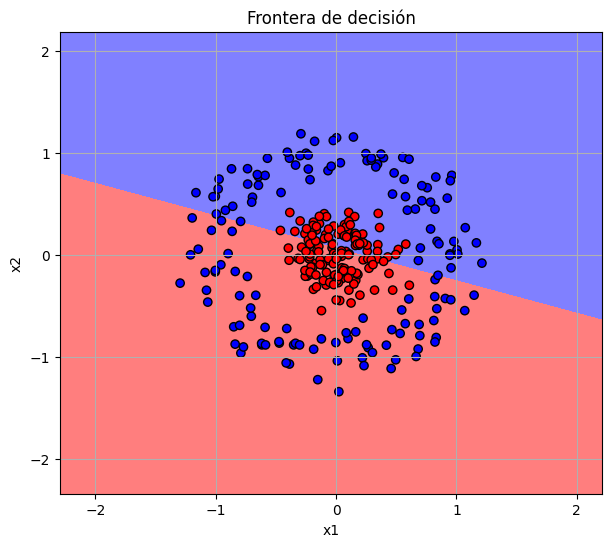

In [ ]:
plot_decision_boundary(model, df[['x1', 'x2']], df['target'], scaler)

¡Cómo podemos ver, una sóla neurona dividió a los puntos con una recta! Si el conjunto de datos hubiera sido más complejo, el error habría sido mayor.

## **Mini Desafio 3b**

Prueben ahora con 2 neuronas, con 3 neuronas y con 4 neuronas; y observen el umbral de decisión para cada caso. ¿Hay algún valor a partir del cual el **accuracy** se dispara hacia valores cercanos a 1? ¿Qué relación tiene con el umbral de decisión aprendido para cada caso?

In [ ]:
# Mino desafío 3b
# Aprovechamos el código ya provisto

# Definimos la red neuronal MLP
model = Sequential([
    Dense(2, input_shape=(2,), activation='relu'),
    Dense(1,  activation='sigmoid')
])

model.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

# 6. Entrenamos el modelo
history = model.fit(X_train_scaled, y_train, batch_size=32, epochs=50, validation_split=0.2, verbose=1)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_29 (Dense)                │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 157ms/step - accuracy: 0.4647 - loss: 1.0551 - val_accuracy: 0.3333 - val_loss: 1.1756
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.4420 - loss: 0.9834 - val_accuracy: 0.2917 - val_loss: 1.0696
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.4359 - loss: 0.8735 - val_accuracy: 0.3125 - val_loss: 0.9836
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.3516 - loss: 0.8766 - val_accuracy: 0.3125 - val_loss: 0.9103
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3163 - loss: 0.8372 - val_accuracy: 0.2708 - val_loss: 0.8524
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2978 - loss: 0.8065 - val_accuracy: 0.3125 - val_loss: 0.8083
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3439 - loss: 0.7823 - val_accuracy: 0.3333 - val_loss: 0.7739
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3209 - loss: 0.7646 - val_accuracy: 0.3750 - val_loss: 0.7510

In [ ]:
# Evaluamos
loss, acc = model.evaluate(X_test_scaled, y_test)
print(f'\n🔎 Precisión en test: {acc*100:.2f}%')

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step - accuracy: 0.6313 - loss: 0.6610

🔎 Precisión en test: 65.00%


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


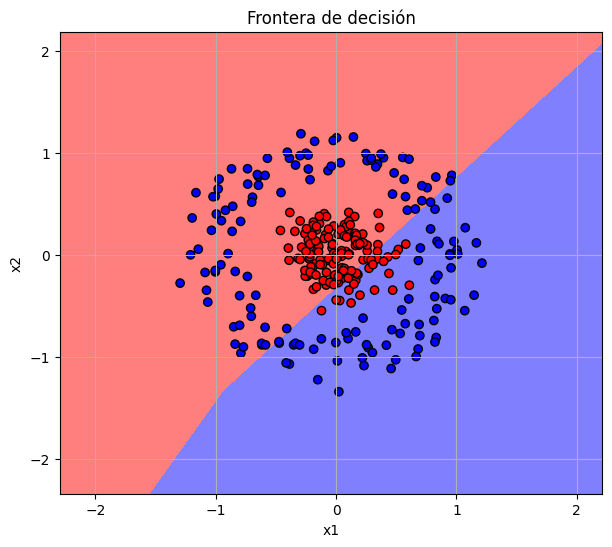

In [ ]:
plot_decision_boundary(model, df[['x1', 'x2']], df['target'], scaler)

In [ ]:
# Mino desafío 3b
# Aprovechamos el código ya provisto

# Definimos la red neuronal MLP
model = Sequential([
    Dense(3, input_shape=(2,), activation='relu'),
    Dense(1,  activation='sigmoid')
])

model.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

# 6. Entrenamos el modelo
history = model.fit(X_train_scaled, y_train, batch_size=32, epochs=50, validation_split=0.2, verbose=1)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_31 (Dense)                │ (None, 3)              │             9 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13 (52.00 B)

 Trainable params: 13 (52.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step - accuracy: 0.5229 - loss: 0.6564 - val_accuracy: 0.5833 - val_loss: 0.6171
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5792 - loss: 0.6315 - val_accuracy: 0.6250 - val_loss: 0.6036
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5868 - loss: 0.6188 - val_accuracy: 0.6458 - val_loss: 0.5912
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6510 - loss: 0.5958 - val_accuracy: 0.6458 - val_loss: 0.5797
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6664 - loss: 0.5951 - val_accuracy: 0.7083 - val_loss: 0.5687
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7187 - loss: 0.5917 - val_accuracy: 0.7500 - val_loss: 0.5586
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.7060 - loss: 0.5757 - val_accuracy: 0.7708 - val_loss: 0.5495
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7341 - loss: 0.5699 - val_accuracy: 0.7708 - val_loss: 0.5386

In [ ]:
# Evaluamos
loss, acc = model.evaluate(X_test_scaled, y_test)
print(f'\n🔎 Precisión en test: {acc*100:.2f}%')

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step - accuracy: 1.0000 - loss: 0.1652

🔎 Precisión en test: 100.00%


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


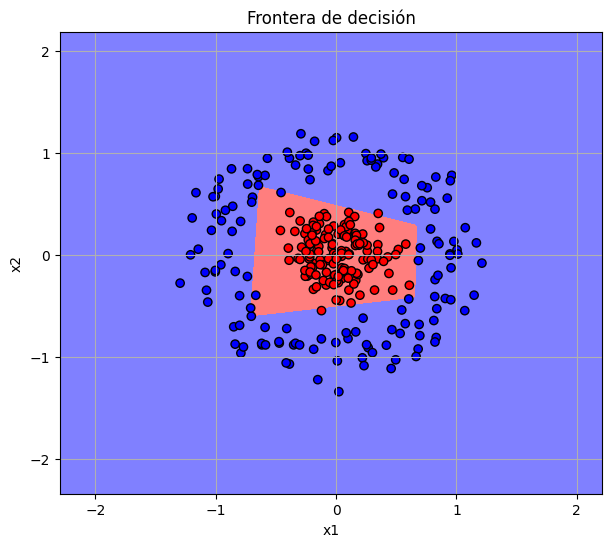

In [ ]:
plot_decision_boundary(model, df[['x1', 'x2']], df['target'], scaler)

In [ ]:
# Mino desafío 3b
# Aprovechamos el código ya provisto

# Definimos la red neuronal MLP
model = Sequential([
    Dense(4, input_shape=(2,), activation='relu'),
    Dense(1,  activation='sigmoid')
])

model.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

# 6. Entrenamos el modelo
history = model.fit(X_train_scaled, y_train, batch_size=32, epochs=50, validation_split=0.2, verbose=1)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                │ (None, 4)              │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17 (68.00 B)

 Trainable params: 17 (68.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.4121 - loss: 0.8927 - val_accuracy: 0.1500 - val_loss: 0.7793
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1982 - loss: 0.7525 - val_accuracy: 0.4313 - val_loss: 0.7109
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5142 - loss: 0.6894 - val_accuracy: 0.4688 - val_loss: 0.6819
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5059 - loss: 0.6563 - val_accuracy: 0.4688 - val_loss: 0.6550
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5616 - loss: 0.6235 - val_accuracy: 0.7063 - val_loss: 0.6243
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8025 - loss: 0.5828 - val_accuracy: 0.7437 - val_loss: 0.5914
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7878 - loss: 0.5590 - val_accuracy: 0.7750 - val_loss: 0.5567
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8247 - loss: 0.5250 - val_accuracy: 0.8000 - val_loss

In [ ]:
# Evaluamos
loss, acc = model.evaluate(X_test_scaled, y_test)
print(f'\n🔎 Precisión en test: {acc*100:.2f}%')

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9603 - loss: 0.1035

🔎 Precisión en test: 95.50%


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


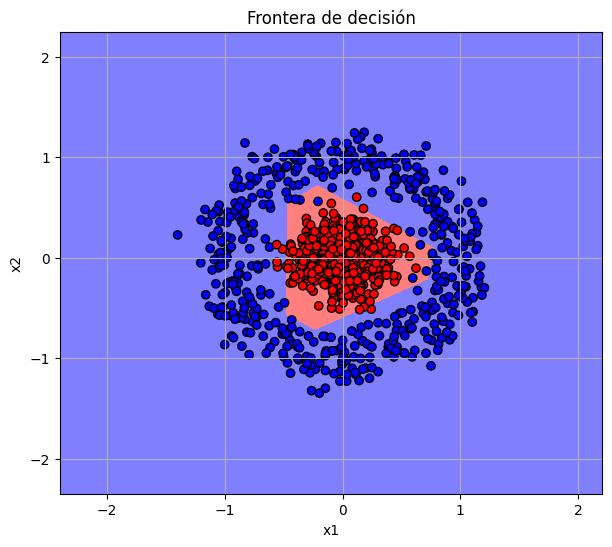

In [ ]:
plot_decision_boundary(model, df[['x1', 'x2']], df['target'], scaler)

## **Mini Desafio 3c**

Experimenten cambiando la cantidad de capas y cantidad de neuronas de cada una. También, prueben aumentar la cantidad de epochs. Noten cómo cambia la cantidad de parámetros entrenables (en el **model.summary**), cómo influye en el tiempo que tarda el entrenamiento y cuánta mejora se obtiene por complejizar al modelo.

Vamos a generar un modelo con 5 capas, con 1024 neuronas en la primera y disminuyendo a la mitad en cada caso.

In [ ]:
# Mino desafío 3c
# Aprovechamos el código ya provisto

# Definimos la red neuronal MLP
model = Sequential([
    Dense(1024, input_shape=(2,), activation='relu'),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(1,  activation='sigmoid')
])

model.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

# 6. Entrenamos el modelo
history = model.fit(X_train_scaled, y_train, batch_size=32, epochs=100, validation_split=0.2, verbose=1)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_33 (Dense)                │ (None, 1024)           │         3,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 692,225 (2.64 MB)

 Trainable params: 692,225 (2.64 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 162ms/step - accuracy: 0.5853 - loss: 0.8269 - val_accuracy: 0.9167 - val_loss: 0.5192
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9504 - loss: 0.3862 - val_accuracy: 0.9792 - val_loss: 0.0537
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9751 - loss: 0.1437 - val_accuracy: 0.9583 - val_loss: 0.1455
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9603 - loss: 0.1755 - val_accuracy: 1.0000 - val_loss: 0.0121
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9821 - loss: 0.0914 - val_accuracy: 0.9792 - val_loss: 0.0494
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9506 - loss: 0.0755 - val_accuracy: 0.9792 - val_loss: 0.0559
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9455 - loss: 0.0763 - val_accuracy: 1.0000 - val_loss: 0.0308
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9950 - loss: 0.0320 - val_accuracy: 1.0000 - val_loss

In [ ]:
# Evaluamos
loss, acc = model.evaluate(X_test_scaled, y_test)
print(f'\n🔎 Precisión en test: {acc*100:.2f}%')

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step - accuracy: 1.0000 - loss: 0.0126

🔎 Precisión en test: 100.00%


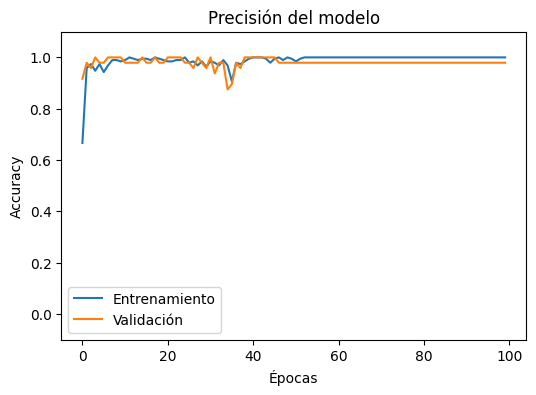

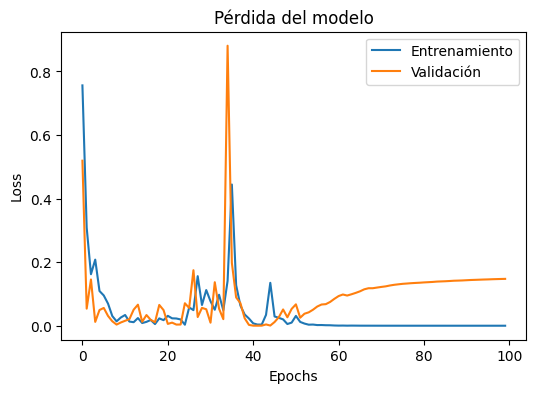

In [ ]:
# Accuracy
plt.figure(figsize=(6, 4))
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.ylim([-0.1,1.1])
plt.title('Precisión del modelo')
plt.xlabel('Épocas')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss
plt.figure(figsize=(6, 4))
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Pérdida del modelo')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


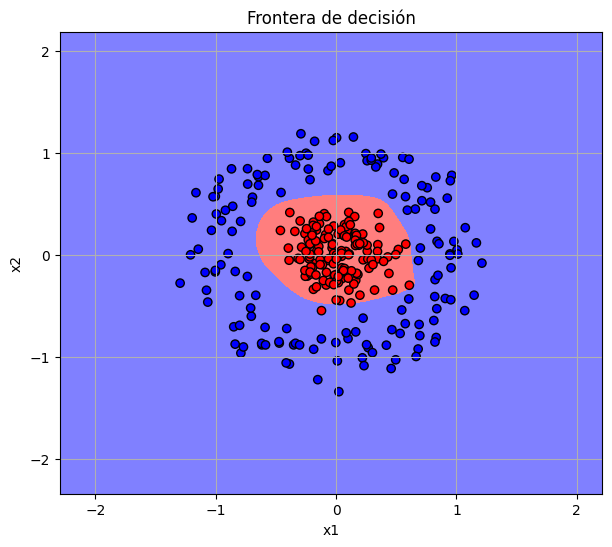

In [ ]:
plot_decision_boundary(model, df[['x1', 'x2']], df['target'], scaler)

## **Mini Desafío 4**

Prueben agregarle más capas al modelo y entrenar con un mayor número de epochs (para el dataset MNIST). Grafiquen la evolución de la función de costo en función del número de epoch. ¿Se obtienen mejores resultados con mayor complejidad del modelo?

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.utils import to_categorical
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train/255
x_test = x_test/255

# One-hot encoding de las etiquetas
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

print(f"Label original: {y_train[0]}")
print(f"One-hot encoding: {y_train_cat[0]}")

# 2. Definición del modelo
model = Sequential([
    Flatten(input_shape=(28, 28)),       # Aplana la imagen de 28x28 a 784
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')      # Capa de salida con 10 clases
])

# 3. Compilación del modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 4. Entrenamiento
history = model.fit(x_train, y_train_cat,
                    validation_split=0.2,
                    epochs=50,
                    batch_size=32)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Label original: 5
One-hot encoding: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8776 - loss: 0.4013 - val_accuracy: 0.9588 - val_loss: 0.1347
Epoch 2/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9679 - loss: 0.1034 - val_accuracy: 0.9655 - val_loss: 0.1224
Epoch 3/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9779 - loss: 0.0728 - val_accuracy: 0.9706 - val_loss: 0.1005
Epoch 4/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9846 - loss: 0.0506 - val_accuracy: 0.9664 - val_loss: 0.1275
Epoch 5/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9864 - loss: 0.0430 - val_accuracy: 0.9708 - val_loss: 0.1076
Epoch 6/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9900 - loss: 0.0331 - val_accuracy: 0.9754 - val_loss: 0.0927
Epoch 7/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9918 - loss: 0.0267 - val_accuracy: 0.9737 - val_loss: 0.1057
Epoch 8/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9913 - loss: 0.0276 - 

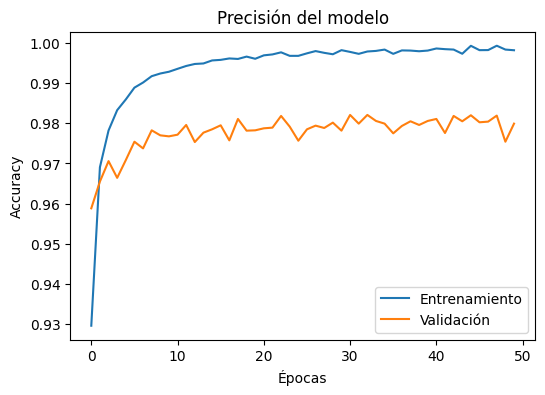

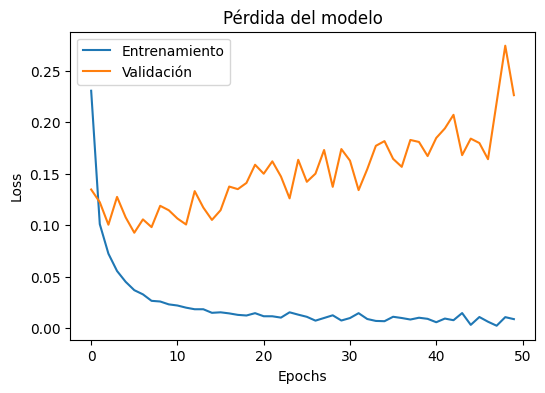

In [ ]:
# Accuracy
plt.figure(figsize=(6, 4))
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Precisión del modelo')
plt.xlabel('Épocas')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss
plt.figure(figsize=(6, 4))
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Pérdida del modelo')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# 5. Evaluación final en el set de test
test_loss, test_acc = model.evaluate(x_test, y_test_cat)
print(f"\n📈 Precisión en test: {test_acc*100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9791 - loss: 0.2139

📈 Precisión en test: 98.17%


# Ejercitación Integradora
$\newcommand{\dif}{\bigstar}$$\newcommand{\facil}{\color{\green}{\dif}}$ $\newcommand{\pieceofcake}{\color{cyan}{\dif}}$$\newcommand{\medio}{\color{\yellow}{\dif\dif}}$$\newcommand{\media}{\medio}$$\newcommand{\normal}{\medio}$  $\newcommand{\dificil}{\color{\orange}{\dif\dif\dif}}$ $\newcommand{\imposible}{\color{\red}{\dif\dif\dif\dif}}$

## $\facil$ Yendo al límite

Un estudiante se encuentra volviendo a su casa por una ruta nueva cuando se da cuenta de un problema, no conoce el límite de velocidad de la misma. Dado que el quiere volver lo antes posible pero no quiere pagar una multa por exceso de velocidad es importante tener una aproximación de cuanto sería esta velocidad máxima.

Afortunadamente, recuerda los límites de velocidad de otras rutas de la zona. Si bien la velocidad máxima depende de varios factores, el más importante está relacionado con la seguridad que ofrece la ruta. Para simplificar, se puede representar la seguridad con un valor entre 1 y 10 (donde 10 corresponde a una ruta muy segura y 1 a una muy peligrosa). Dado que esta ruta es nueva y se encuentra en condiciones impecables, se debe calcular qué tan rápido puede circular el estudiante sin recibir una multa.

| Velocidad máxima | Seguridad de la ruta |
|:---------------:|:-----------------:|
|       60        |         2         |
|       70        |         3         |
|       80        |         4         |
|       90        |        4.5        |
|      100        |         5         |
|      110        |        5.5        |
|      120        |         6         |
|      130        |        6.5        |
|      140        |         7         |
|      145        |        7.5        |
|      148        |         8         |
|      150        |         9         |
|      150        |        9.5        |
|      150        |        10         |

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

VelocidadMaxima = [60, 70, 80, 90, 100, 110, 120, 130, 140, 145, 148, 150, 150, 150]
SeguridadDeLaRuta =  [2, 3, 4, 4.5, 5, 5.5, 6, 6.5, 7, 7.5, 8, 9, 9.5, 10]

a, b, c, d = np.polyfit(SeguridadDeLaRuta, VelocidadMaxima,  3)

X = []
Y = []
exp = 5
for x in range(0, exp* max(SeguridadDeLaRuta) + 1,1):
    X.append(x/exp)
    y = a * (x/exp)**3 +b * (x/exp)**2 + c * (x/exp) + d
    Y.append(y)

plt.scatter(SeguridadDeLaRuta, VelocidadMaxima, color='blue', marker='o', label='Datos')
plt.plot(X, Y, color='red')
plt.title("Regresión lineal")
plt.xlabel("Seguridad de la ruta")
plt.ylabel("Velocidad Maxima (km/h)")
plt.grid(True)
plt.show()

## $\medio$ Take me to the moon...

Clasificar, utilizando una red neuronal, los puntos en el plano 2D distribuidos en forma de lunas crecientes (dos semicírculos entrelazados). Les dejamos el código que importa de Scikit Learn la función que genera dicha distribución de puntos y sus respectivas clases.

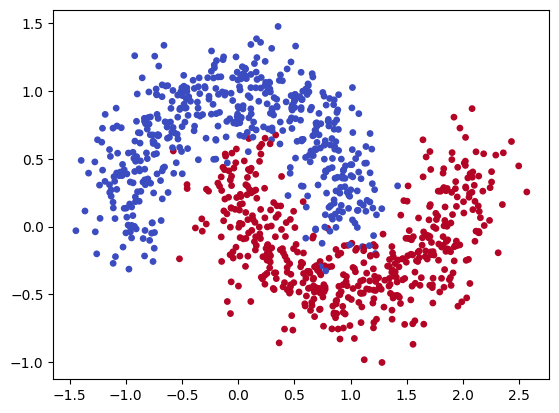

In [ ]:
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)

plt.scatter(X[:,0], X[:,1], c=y, cmap="coolwarm", s=15)
plt.show()

In [ ]:
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# 2. Definición del modelo
model = Sequential([
    Dense(32, activation='relu', input_shape=(2,)),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')      # Capa de salida con 4 clases
])

# 3. Compilación del modelo
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# 4. Entrenamiento
history = model.fit(X_train_scaled, y_train,
                    validation_split=0.2,
                    epochs=50,
                    batch_size=32)

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.5416 - loss: 0.6625 - val_accuracy: 0.6250 - val_loss: 0.5803
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6369 - loss: 0.5913 - val_accuracy: 0.8875 - val_loss: 0.5070
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8247 - loss: 0.5371 - val_accuracy: 0.9000 - val_loss: 0.4482
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8406 - loss: 0.4823 - val_accuracy: 0.9000 - val_loss: 0.3893
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8392 - loss: 0.4332 - val_accuracy: 0.9187 - val_loss: 0.3204
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8351 - loss: 0.4065 - val_accuracy: 0.9187 - val_loss: 0.2629
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8432 - loss: 0.3480 - val_accuracy: 0.9187 - val_loss: 0.2317
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8493 - loss: 0.3196 - val_accuracy: 0.9187 - val_loss

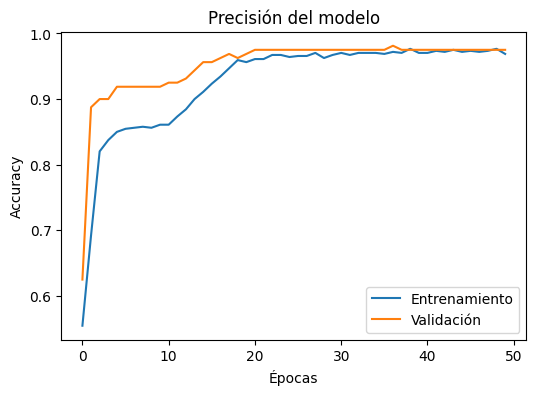

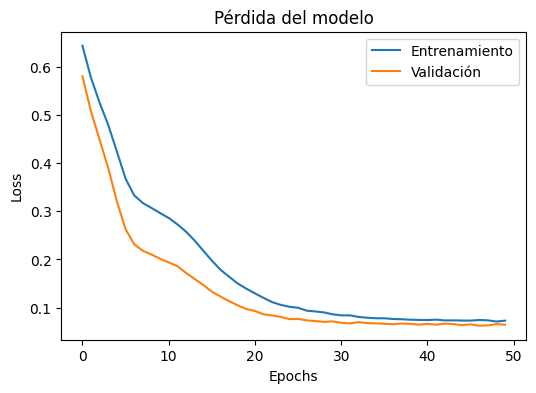

In [ ]:
# Accuracy
plt.figure(figsize=(6, 4))
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Precisión del modelo')
plt.xlabel('Épocas')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss
plt.figure(figsize=(6, 4))
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Pérdida del modelo')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

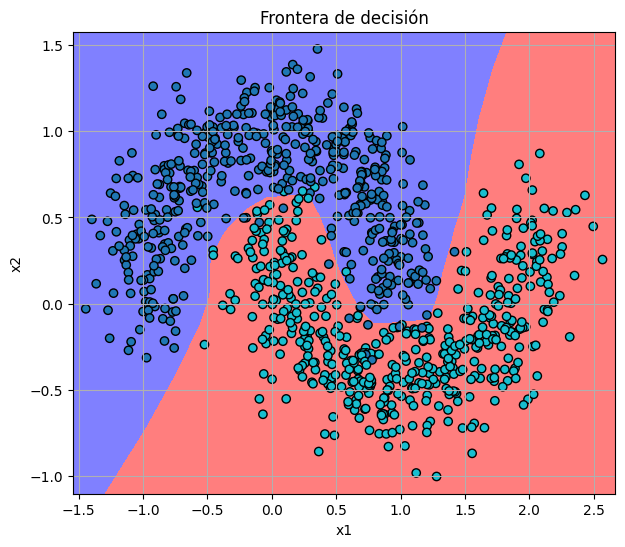

In [ ]:
import numpy as np

def plot_decision_boundary(model, X, y, scaler, title="Frontera de decisión"):
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                         np.linspace(y_min, y_max, 300))

    grid = np.c_[xx.ravel(), yy.ravel()]
    grid_scaled = scaler.transform(grid)
    probs = model.predict(grid_scaled, verbose=0).reshape(xx.shape)

    plt.figure(figsize=(7, 6))
    plt.contourf(xx, yy, probs, levels=[0, 0.5, 1], cmap="bwr", alpha=1)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap="tab10", edgecolor="k")
    plt.title(title)
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.grid(True)
    plt.show()

plot_decision_boundary(model, X, y, scaler)

In [ ]:
# 5. Evaluación final en el set de test
test_loss, test_acc = model.evaluate(X_test_scaled, y_test)
print(f"\n📈 Precisión en test: {test_acc*100:.2f}%")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9954 - loss: 0.0252  

📈 Precisión en test: 99.00%


## $\dificil$ Círculos concéntricos $^2$

Clasificar, utilizando una red neuronal, los puntos en el plano 2D distribuidos en forma cuatro circunferencias concéntricas. Cada sección de circunferencia pertenece a una clase distinta. Les dejamos el código que genera a los puntos y a sus respectivas clases.

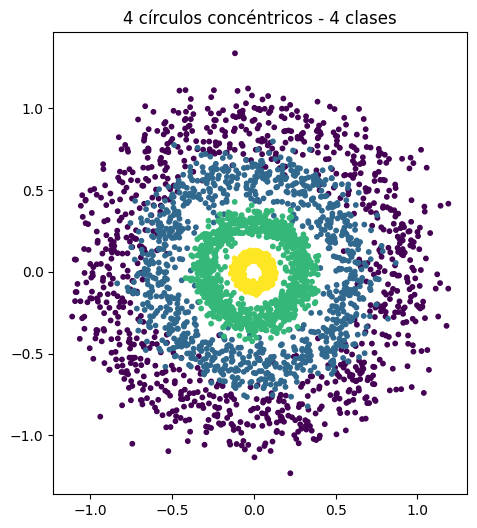

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

# Función auxiliar para generar un círculo con una clase
def generar_circulo(n_samples, radio, ruido, clase):
    X, _ = make_circles(n_samples=n_samples*2, factor=0.5, noise=ruido)
    # Nos quedamos solo con un círculo (el externo siempre tiene radio ~1, interno ~factor)

    X = X[_ == 0] * radio

    y = np.full(len(X), clase)
    return X, y

# Generar 4 círculos
X1, y1 = generar_circulo(1000, 0.9, 0.15, 0)   # círculo grande
X2, y2 = generar_circulo(1000, 0.6, 0.15, 1)   # círculo medio-grande
X3, y3 = generar_circulo(1000, 0.3, 0.15, 2)   # círculo medio-chico
X4, y4 = generar_circulo(1000, 0.1, 0.15, 3)   # círculo chico

# Concatenar todo
X = np.vstack([X1, X2, X3, X4])
y = np.concatenate([y1, y2, y3, y4])

# Graficar
plt.figure(figsize=(6,6))
plt.scatter(X[:,0], X[:,1], c=y, cmap="viridis", s=10)
plt.gca().set_aspect("equal")
plt.title("4 círculos concéntricos - 4 clases")
plt.show()

In [ ]:
print(X.shape)

(4000, 2)


In [ ]:
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# One-hot encoding de las etiquetas
y_train_cat = to_categorical(y_train, 4)
y_test_cat = to_categorical(y_test, 4)

print(f"Label original: {y_train[0]}")
print(f"One-hot encoding: {y_train_cat[0]}")

Label original: 3
One-hot encoding: [0. 0. 0. 1.]


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [ ]:
# 2. Definición del modelo
model = Sequential([
    Dense(16, activation='relu', input_shape=(2,)),
    Dense(4, activation='softmax')      # Capa de salida con 4 clases
])

# 3. Compilación del modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 4. Entrenamiento
history = model.fit(X_train_scaled, y_train_cat,
                    validation_split=0.2,
                    epochs=50,
                    batch_size=32)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.2737 - loss: 1.4100 - val_accuracy: 0.3750 - val_loss: 1.3325
Epoch 2/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4155 - loss: 1.2999 - val_accuracy: 0.4844 - val_loss: 1.2446
Epoch 3/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5317 - loss: 1.2316 - val_accuracy: 0.6047 - val_loss: 1.1704
Epoch 4/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6122 - loss: 1.1543 - val_accuracy: 0.6750 - val_loss: 1.0996
Epoch 5/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6817 - loss: 1.0844 - val_accuracy: 0.7281 - val_loss: 1.0298
Epoch 6/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7233 - loss: 1.0195 - val_accuracy: 0.7719 - val_loss: 0.9652
Epoch 7/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7639 - loss: 0.9568 - val_accuracy: 0.7891 - val_loss: 0.9053
Epoch 8/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7813 - loss: 0.8961 - val_accuracy: 0.8188 - val_loss

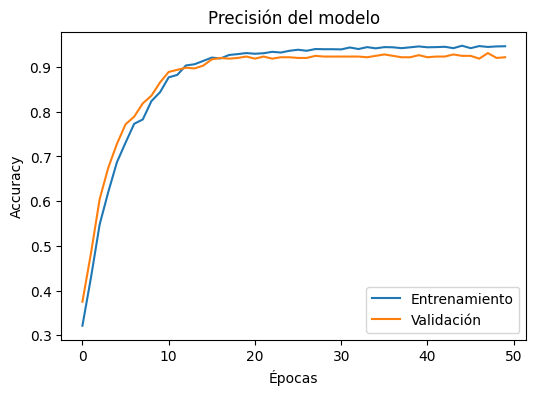

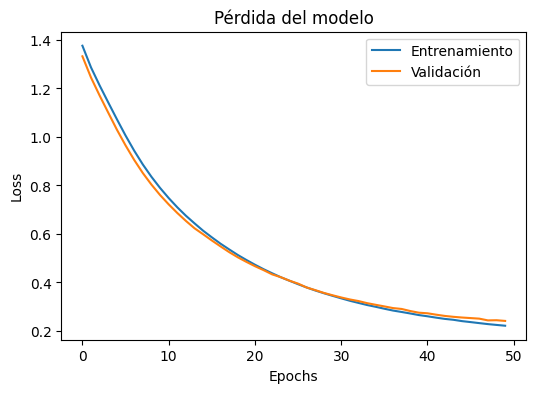

In [ ]:
# Accuracy
plt.figure(figsize=(6, 4))
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Precisión del modelo')
plt.xlabel('Épocas')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss
plt.figure(figsize=(6, 4))
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Pérdida del modelo')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

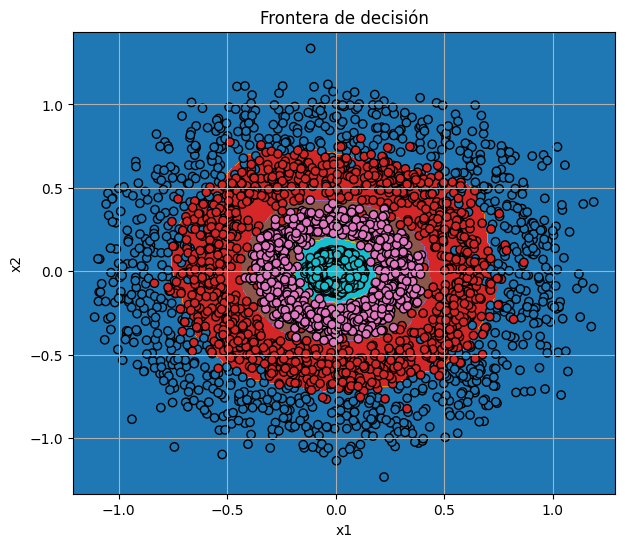

In [ ]:
def plot_decision_boundary_4(model, X, y, scaler, title="Frontera de decisión"):
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                         np.linspace(y_min, y_max, 300))

    grid = np.c_[xx.ravel(), yy.ravel()]
    grid_scaled = scaler.transform(grid)
    preds = np.argmax(model.predict(grid_scaled, verbose=0), axis=1)  # clase predicha
    preds = preds.reshape(xx.shape)

    plt.figure(figsize=(7, 6))
    plt.contourf(xx, yy, preds, alpha=1, cmap="tab10")  # más colores
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap="tab10", edgecolor="k")
    plt.title(title)
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.grid(True)
    plt.show()

plot_decision_boundary_4(model, X, y, scaler)

In [ ]:
# 5. Evaluación final en el set de test
test_loss, test_acc = model.evaluate(X_test_scaled, y_test_cat)
print(f"\n📈 Precisión en test: {test_acc*100:.2f}%")

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9565 - loss: 0.2067

📈 Precisión en test: 95.88%


## $\dificil$ Clasificación de cáncer de mama

Implementar un clasificador con redes neuronales (MLP) para predecir si un tumor es benigno o maligno, utilizando el dataset Breast Cancer Wisconsin incluido en scikit-learn.

El dataset contiene 569 muestras de tumores.

Cada muestra está caracterizada por 30 atributos numéricos (ejemplo: radio, textura, simetría, etc.).

La variable objetivo es binaria:

- 0 = maligno

- 1 = benigno

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
import pandas as pd

data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name="target")

df = pd.concat([X, y], axis=1)

print(df.head())

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import confusion_matrix, classification_report

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(X_scaled)

# Separar en train/test
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

[[ 1.09706398 -2.07333501  1.26993369 ...  2.29607613  2.75062224
   1.93701461]
 [ 1.82982061 -0.35363241  1.68595471 ...  1.0870843  -0.24388967
   0.28118999]
 [ 1.57988811  0.45618695  1.56650313 ...  1.95500035  1.152255
   0.20139121]
 ...
 [ 0.70228425  2.0455738   0.67267578 ...  0.41406869 -1.10454895
  -0.31840916]
 [ 1.83834103  2.33645719  1.98252415 ...  2.28998549  1.91908301
   2.21963528]
 [-1.80840125  1.22179204 -1.81438851 ... -1.74506282 -0.04813821
  -0.75120669]]


In [ ]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=16,
    validation_split=0.2,
    verbose=1
)

Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9422 - loss: 0.4285 - val_accuracy: 0.9451 - val_loss: 0.2811
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9403 - loss: 0.2514 - val_accuracy: 0.9560 - val_loss: 0.2022
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9542 - loss: 0.1911 - val_accuracy: 0.9560 - val_loss: 0.1645
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9588 - loss: 0.1379 - val_accuracy: 0.9780 - val_loss: 0.1419
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9668 - loss: 0.1113 - val_accuracy: 0.9780 - val_loss: 0.1297
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9860 - loss: 0.0721 - val_accuracy: 0.9670 - val_loss: 0.1192
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9832 - loss: 0.0646 - val_accuracy: 0.9780 - val_loss: 0.1136
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9890 - loss: 0.0542 - val_accuracy: 0.9670 - val_loss: 0.1136
Ep

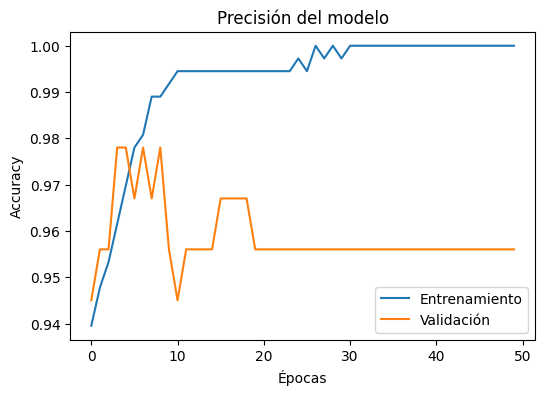

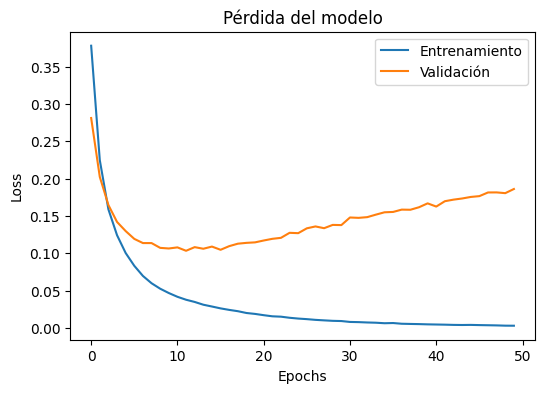

In [ ]:
# Accuracy
plt.figure(figsize=(6, 4))
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Precisión del modelo')
plt.xlabel('Épocas')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss
plt.figure(figsize=(6, 4))
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Pérdida del modelo')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# 5. Evaluación final en el set de test
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"\n📈 Precisión en test: {test_acc*100:.2f}%")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9794 - loss: 0.1342

📈 Precisión en test: 98.25%
